# Facebook Prophet

**Papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**
Link to paper: https://peerj.com/preprints/3190.pdf

FbProphet is a powerful time series analysis package released by Core Data Science Team at Facebook. It is simple and easy to go package for performing time series analytics and forecasting at scale.


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/prophet.png" width="1200">

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.



#### Accurate and fast.
Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. We’ve found it to perform better than any other approach in the majority of cases. We fit models in Stan so that you get forecasts in just a few seconds.

#### Fully automatic.
Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

#### Tunable forecasts.
The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge.

In [ ]:
import pandas as pd
from prophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/BeerWineLiquor.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
df = pd.read_csv('BeerWineLiquor.csv')
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    324 non-null    datetime64[ns]
 1   beer    324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


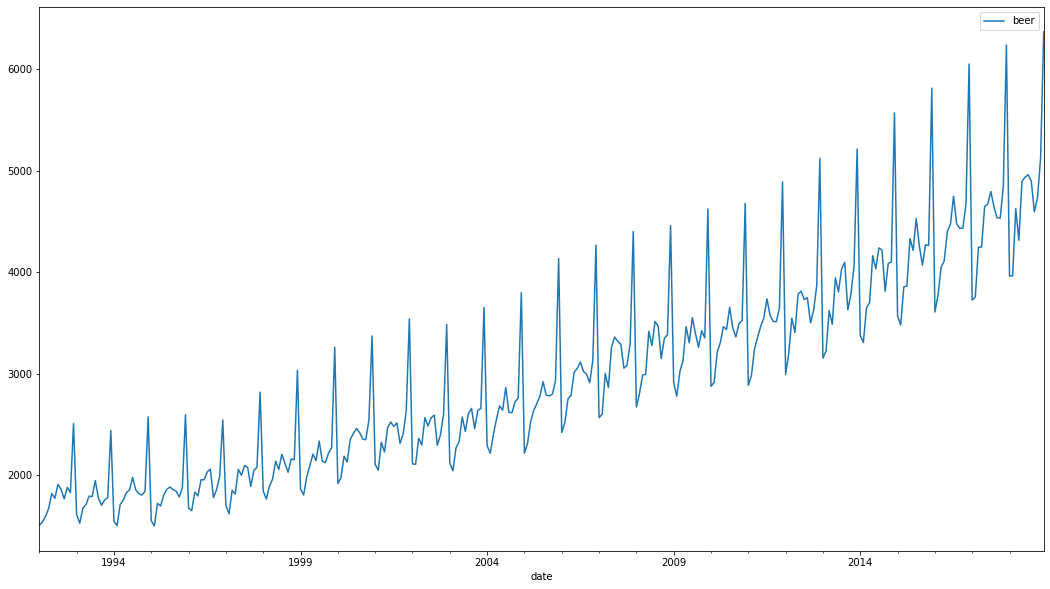

In [ ]:
df.plot(x='date',y='beer',figsize=(18,10));

### Format the Data for PROPHET STANDARD

In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [ ]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
model = m.fit(df)

20:07:51 - cmdstanpy - INFO - Chain [1] start processing
20:07:51 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [ ]:
future = model.make_future_dataframe(periods=24,freq = 'MS')

In [ ]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [ ]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [ ]:
len(df)

324

In [ ]:
len(future) # 324 past +24 forecast future

348


### Step 2: Predict and fill in the Future

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1775.924150,1142.908477,1479.610522,1775.924150,1775.924150,-461.772065,-461.772065,-461.772065,-461.772065,-461.772065,-461.772065,0.0,0.0,0.0,1314.152085
1,1992-02-01,1778.672038,1191.584384,1504.719393,1778.672038,1778.672038,-426.071834,-426.071834,-426.071834,-426.071834,-426.071834,-426.071834,0.0,0.0,0.0,1352.600204
2,1992-03-01,1781.242643,1441.525233,1761.140800,1781.242643,1781.242643,-178.116295,-178.116295,-178.116295,-178.116295,-178.116295,-178.116295,0.0,0.0,0.0,1603.126348
3,1992-04-01,1783.990531,1422.458096,1745.269268,1783.990531,1783.990531,-196.084627,-196.084627,-196.084627,-196.084627,-196.084627,-196.084627,0.0,0.0,0.0,1587.905904
4,1992-05-01,1786.649778,1665.726534,1994.430939,1786.649778,1786.649778,44.517727,44.517727,44.517727,44.517727,44.517727,44.517727,0.0,0.0,0.0,1831.167505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5202.435967,5077.721806,5406.586052,5191.335816,5214.858161,38.953794,38.953794,38.953794,38.953794,38.953794,38.953794,0.0,0.0,0.0,5241.389761
344,2020-09-01,5218.524536,4921.885240,5251.095416,5206.343472,5232.104603,-134.401102,-134.401102,-134.401102,-134.401102,-134.401102,-134.401102,0.0,0.0,0.0,5084.123434
345,2020-10-01,5234.094119,5024.835952,5357.695381,5221.108197,5248.734806,-43.336212,-43.336212,-43.336212,-43.336212,-43.336212,-43.336212,0.0,0.0,0.0,5190.757907
346,2020-11-01,5250.182689,5178.013376,5501.645814,5236.080550,5266.173839,88.966699,88.966699,88.966699,88.966699,88.966699,88.966699,0.0,0.0,0.0,5339.149388


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
323,2018-12-01,5990.293737,5811.476733,6163.617540
324,2019-01-01,4445.293641,4287.565233,4611.046465
325,2019-02-01,4470.436854,4305.061915,4619.441802
326,2019-03-01,4708.634603,4543.945876,4869.926334
327,2019-04-01,4732.603056,4572.141291,4887.195174
328,2019-05-01,5004.719244,4855.633988,5176.865027
329,2019-06-01,4994.696674,4828.911925,5152.529165
330,2019-07-01,5141.310656,4973.773698,5309.812125
331,2019-08-01,5049.027439,4893.840223,5213.013669
332,2019-09-01,4909.075787,4746.456768,5074.904670


### Plotting Forecast

We can use Prophet's own built in plotting tools

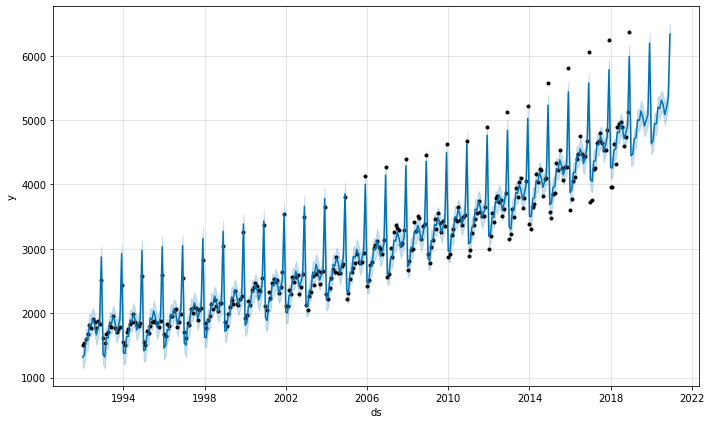

In [ ]:
model.plot(forecast);

(528.0, 600.0)

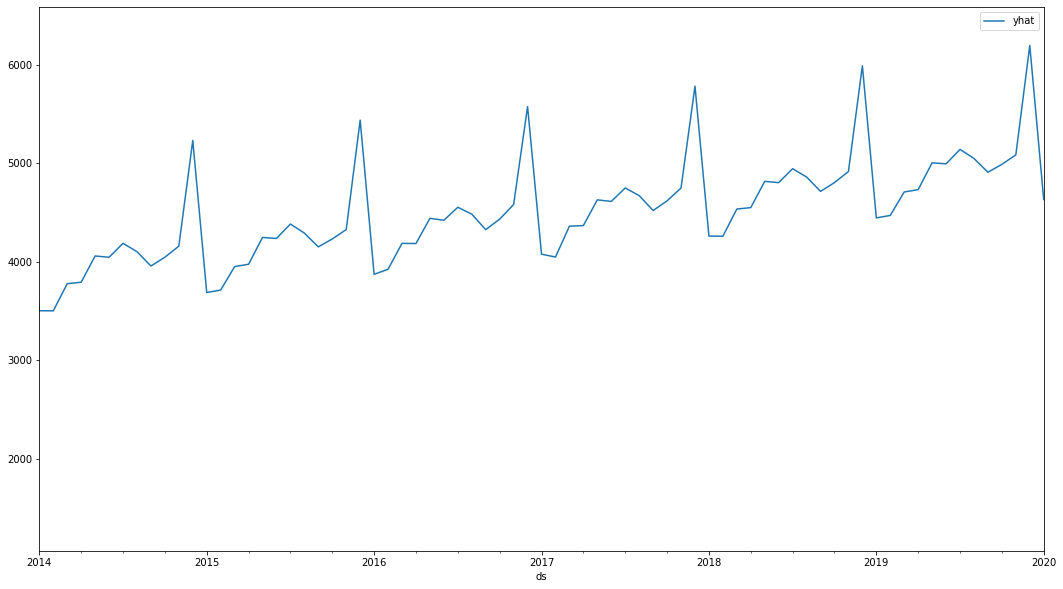

In [ ]:
import matplotlib.pyplot as plt

forecast.plot(x='ds',y='yhat',figsize=(18,10))

plt.xlim('2014-01-01','2020-01-01')

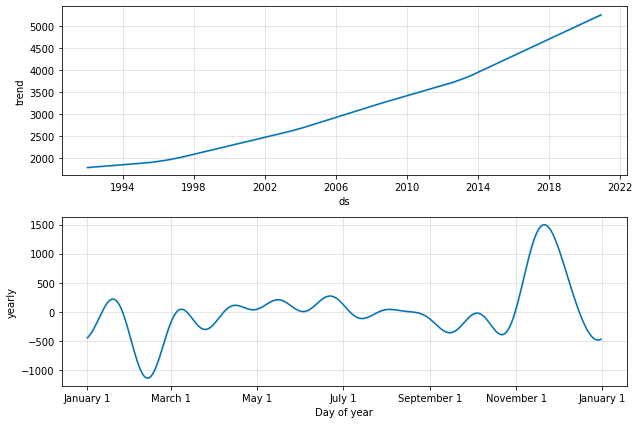

In [ ]:
model.plot_components(forecast);

## Changing Seasonality with Prophet


In [ ]:
import pandas as pd
from prophet import Prophet

%matplotlib inline

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/airline_passengers.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
df = pd.read_csv('airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

20:10:00 - cmdstanpy - INFO - Chain [1] start processing
20:10:00 - cmdstanpy - INFO - Chain [1] done processing


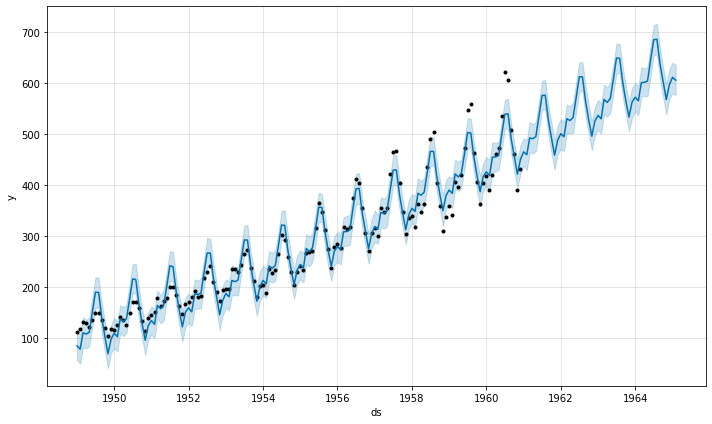

In [ ]:
m = Prophet()
model = m.fit(df)
future = model.make_future_dataframe(50, freq='MS')
forecast = model.predict(future)

fig = model.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

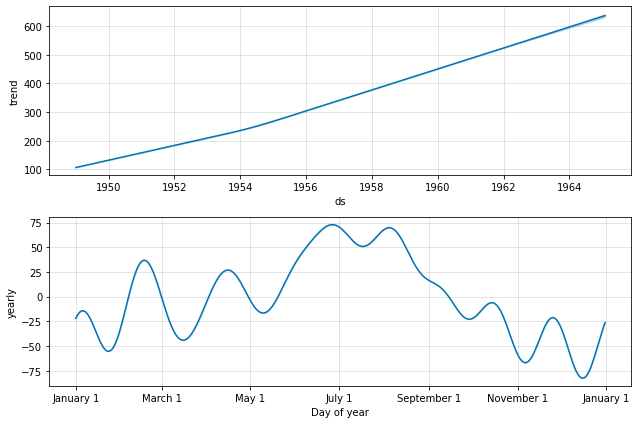

In [ ]:
fig = model.plot_components(forecast)

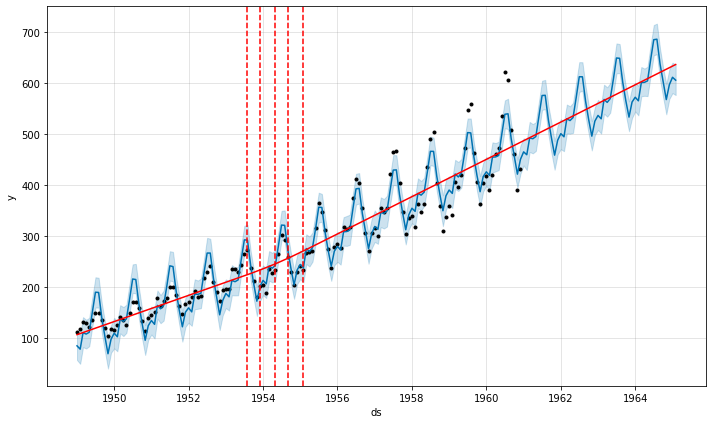

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

### Change to Multiplicative 

20:11:12 - cmdstanpy - INFO - Chain [1] start processing
20:11:12 - cmdstanpy - INFO - Chain [1] done processing


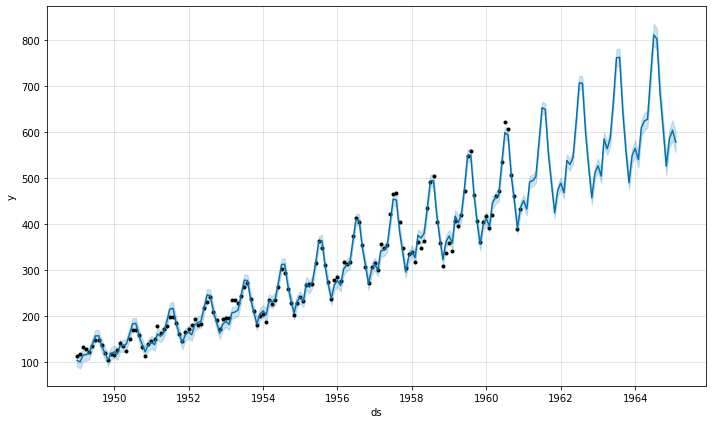

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
model = m.fit(df)
forecast = model.predict(future)
fig = model.plot(forecast)

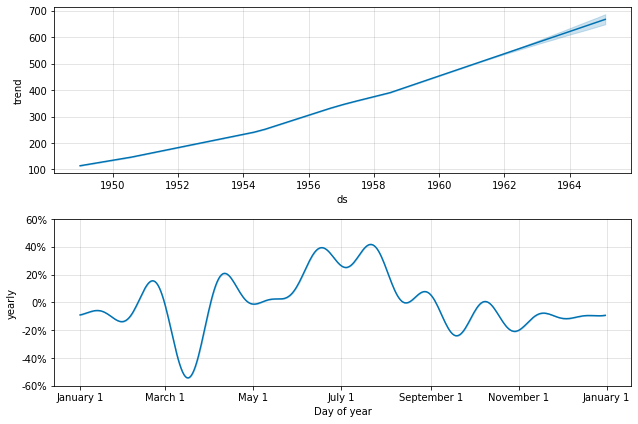

In [ ]:
fig = model.plot_components(forecast)

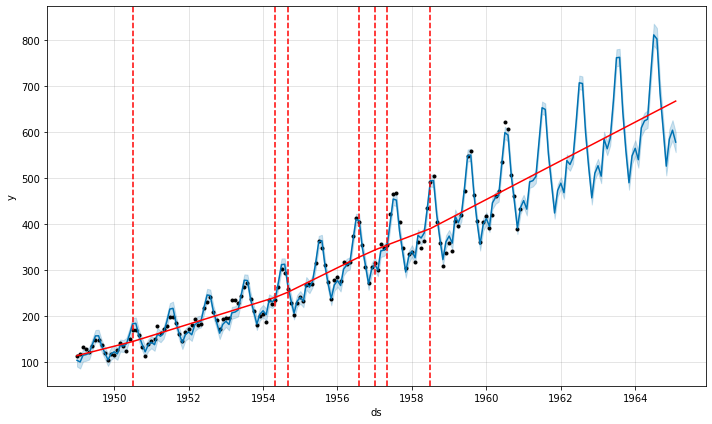

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)